In [161]:
import igraph as ig
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

In [3]:
# random Walk on Networks
g1 = ig.Graph.Erdos_Renyi(900,0.015)

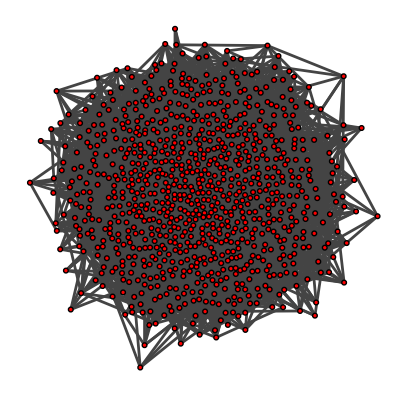

In [4]:
# ER network (900 nodes,p = 0.015)
fig, ax = plt.subplots(figsize=(5,5))
ig.plot(
    g1,
    target=ax
)
plt.show()

In [14]:
# function - GCC 
def get_gcc(g):
    # Find connected components
    connected_components = g.connected_components()
    # Get the Giant Connected Component (GCC)
    gcc = connected_components.giant()
    return gcc

In [96]:
# function -- random walk ,shortest path,  degree of destination node
def random_walk(g,t = 100,it = 100):
    T = np.zeros(t)
    Path_length = np.zeros((t,it))
    Degree_D = np.zeros((t,it))
    gcc = get_gcc(g1) # get GCC network
    for i in range(t):
        T[i] = i+1
        for j in range(it):
            random_node = random.choice(g1.vs) # random node
            O_node = random.choice(gcc.vs) # Pick a origin
            walk = gcc.random_walk(O_node, i) # WALK
            D_node = walk[i] # last node of WALK
            path = gcc.get_shortest_paths(O_node, D_node) # shortest path of OD
            path_length = len(path[0])-1 # path length
            degree_d = gcc.degree(D_node)
            Path_length[i,j] = path_length
            Degree_D[i,j] = degree_d
    return (T,Path_length,Degree_D)

In [142]:
(T,Path_length,Degree_D) = random_walk(g1,t = 60,it = 100)
(T,Path_length,Degree_D)

(array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
        27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
        40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52.,
        53., 54., 55., 56., 57., 58., 59., 60.]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [1., 1., 1., ..., 1., 1., 1.],
        [2., 2., 2., ..., 2., 2., 2.],
        ...,
        [3., 3., 3., ..., 3., 2., 2.],
        [3., 3., 3., ..., 3., 3., 3.],
        [3., 3., 3., ..., 2., 3., 3.]]),
 array([[13., 13.,  7., ..., 13., 19., 18.],
        [12., 18., 22., ..., 14., 14., 15.],
        [18., 16., 17., ..., 13., 15., 14.],
        ...,
        [14.,  8., 12., ..., 17., 17., 12.],
        [10., 10., 19., ..., 23., 14., 15.],
        [21., 19.,  9., ..., 14., 16., 10.]]))

Text(0, 0.5, '⟨s(t)⟩')

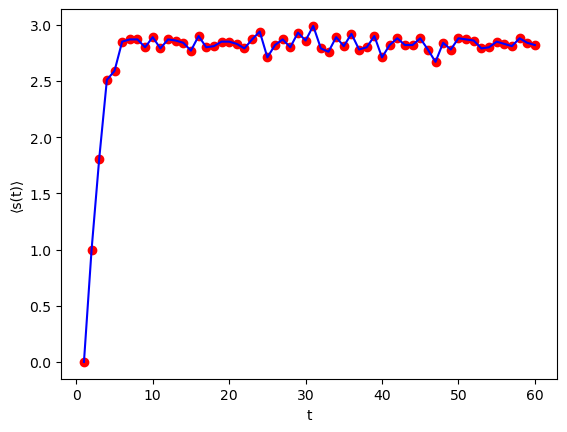

In [143]:
# Average distance
ave_len = np.average(Path_length,axis = 1)
plt.scatter(T,ave_len,color = 'r')
plt.plot(T,ave_len, color = 'b')
plt.xlabel('t')
plt.ylabel('⟨s(t)⟩')

Text(0, 0.5, 'σ^2(t)')

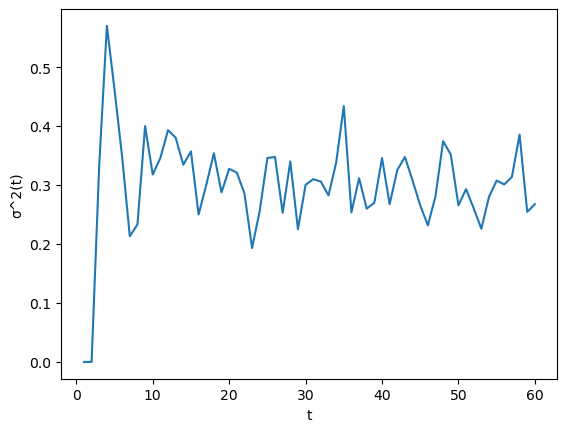

In [146]:
# Variance
var_len = np.var(Path_length,axis = 1)
plt.plot(T,var_len)
plt.xlabel('t')
plt.ylabel('σ^2(t)')

Text(0, 0.5, 'frequency')

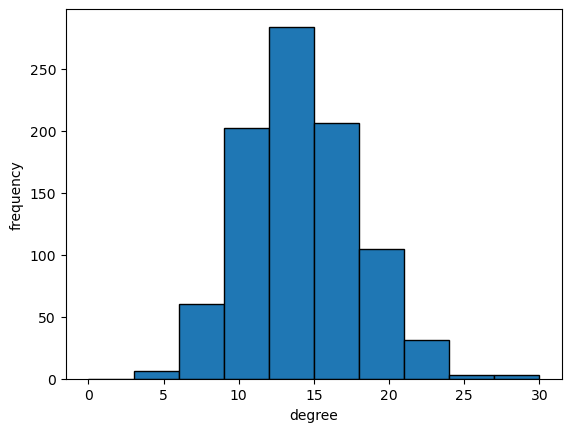

In [204]:
# Degree distribution of the raw graph
Degree = np.zeros(900)
for i in range(900):
    degree = g1.degree(i)
    Degree[i] = degree
plt.hist(Degree,bins = 10,range = (0,30), edgecolor="black")
plt.xlabel('degree')
plt.ylabel('frequency')

Text(0, 0.5, 'frequency')

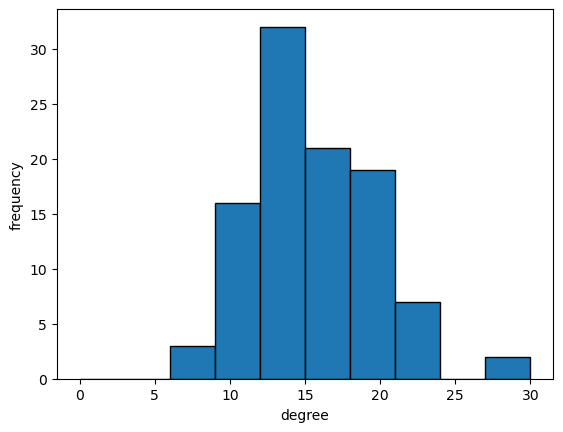

In [207]:
plt.hist(Degree_D[55,:],bins = 10,range = (0,30),edgecolor="black")
plt.xlabel('degree')
plt.ylabel('frequency')

C:\Users\15123\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\15123\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


(0.0, 33.4401440253647)

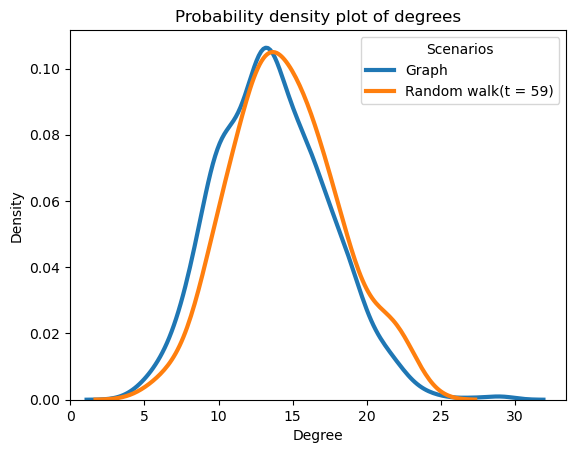

In [202]:
sns.distplot(Degree, hist = False, kde = True,
             kde_kws = {'linewidth': 3},
             label = 'Graph')
sns.distplot(Degree_D[59,:], hist = False, kde = True,
             kde_kws = {'linewidth': 3},
             label = 'Random walk(t = 59)')
plt.legend(prop={'size': 10}, title = 'Scenarios')
plt.title('Probability density plot of degrees')
plt.xlabel('Degree')
plt.ylabel('Density')
plt.xlim(0,)


In [208]:
# Network with 9000 nodes
g2 = ig.Graph.Erdos_Renyi(9000,0.015)

Text(0, 0.5, '⟨s(t)⟩')

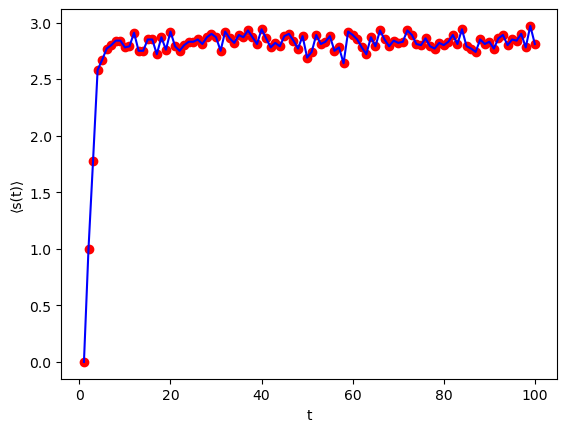

In [209]:
(T,Path_length,Degree_D) = random_walk(g2,t = 100,it = 100)
# Average distance
ave_len = np.average(Path_length,axis = 1)
plt.scatter(T,ave_len,color = 'r')
plt.plot(T,ave_len, color = 'b')
plt.xlabel('t')
plt.ylabel('⟨s(t)⟩')

Text(0, 0.5, 'σ^2(t)')

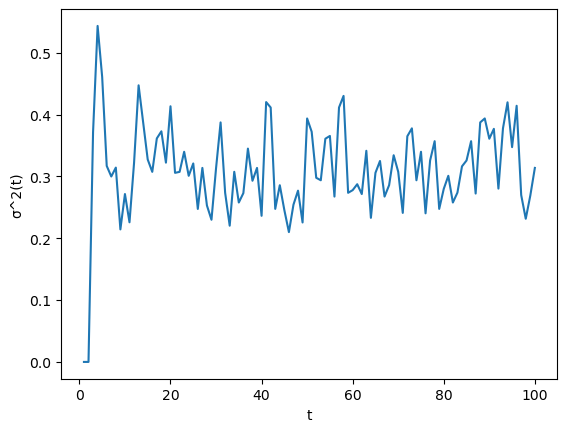

In [210]:
# Variance
var_len = np.var(Path_length,axis = 1)
plt.plot(T,var_len)
plt.xlabel('t')
plt.ylabel('σ^2(t)')

In [218]:
ig.Graph.diameter(g1)
ig.Graph.diameter(g2)

3